In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [64]:
df_train = pd.read_csv(r"D:\GreatLakes\Projects\Bank_Marketing_Targets\train.csv", na_values = ['unknown'])

In [65]:
df_test = pd.read_csv(r"D:\GreatLakes\Projects\Bank_Marketing_Targets\test.csv" , na_values = ['unknown'])

In [66]:
df_train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


In [67]:
df_test.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [68]:
combine = pd.concat([df_train,df_test], ignore_index =True)

In [69]:
combine

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,NaN,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,-1,0,NaN,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,NaN,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [70]:
combine.shape

(49732, 17)

In [71]:
combine.isnull().sum()

age              0
job            326
marital          0
education     2044
default          0
balance          0
housing          0
loan             0
contact      14344
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y                0
dtype: int64

In [72]:
combine.corr(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096564,-0.009880,-0.004399,0.003877,-0.022419,0.000928
balance,0.096564,1.000000,0.003348,0.018195,-0.014147,0.003968,0.017243
day,-0.009880,0.003348,1.000000,-0.029674,0.162336,-0.093166,-0.052083
duration,-0.004399,0.018195,-0.029674,1.000000,-0.083061,-0.000478,0.002330
campaign,0.003877,-0.014147,0.162336,-0.083061,1.000000,-0.089042,-0.035162
pdays,-0.022419,0.003968,-0.093166,-0.000478,-0.089042,1.000000,0.461822
previous,0.000928,0.017243,-0.052083,0.002330,-0.035162,0.461822,1.000000


<Axes: >

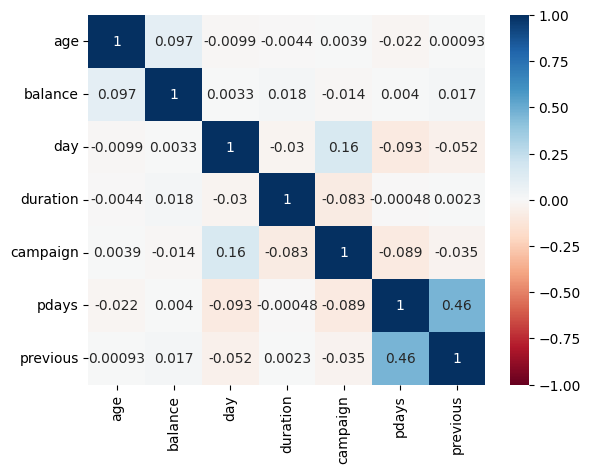

In [73]:
sns.heatmap(combine.corr(numeric_only = True), cmap = 'RdBu', vmin= -1, vmax= 1, annot = True)

In [74]:
combine = pd.get_dummies(data = combine, columns = ['y'], drop_first =True, dtype = 'int')

In [75]:
combine.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0


In [76]:
combine.corr(numeric_only = True)['y_yes'].sort_values(ascending = False)

y_yes       1.000000
duration    0.395099
pdays       0.103665
previous    0.094567
balance     0.049705
age         0.026939
day        -0.026821
campaign   -0.072085
Name: y_yes, dtype: float64

In [77]:
combine['job'].value_counts(dropna= False)

job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
NaN                326
Name: count, dtype: int64

In [78]:
combine.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0


In [79]:
num_cols= ['age', 'balance', 'duration','day','campaign','pdays','previous']
cat_cols = ['job','marital','education','default','housing','loan','contact','month','y_yes']

<Figure size 640x480 with 0 Axes>

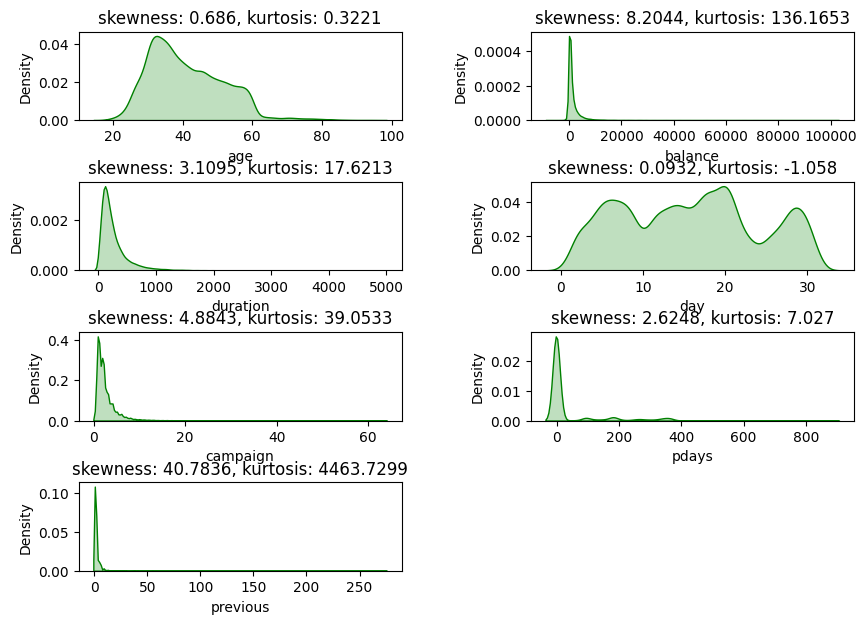

In [80]:
t = 1
plt.suptitle('Numerical variables univariate Analysis', color = 'green')
plt.figure(figsize = (10,7))
for i in num_cols:
    s= combine[i].skew()
    k = combine[i].kurt()
    plt.subplot(4,2,t)
    sns.kdeplot(combine[i], color = 'green', fill = True)
    plt.title(f'skewness: {round(s,4)}, kurtosis: {round(k,4)}')
    t = t+1
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

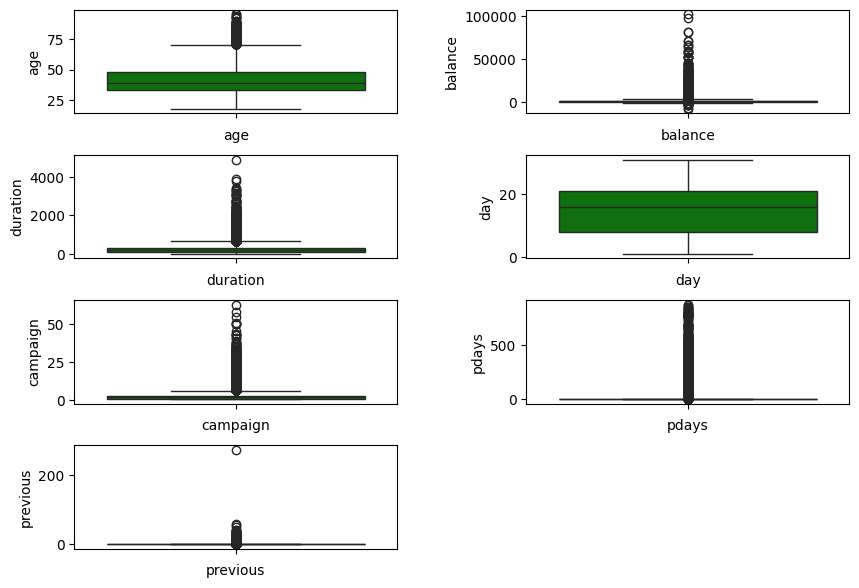

In [81]:
t = 1
plt.suptitle('Numerical variables univariate Analysis', color = 'green')
plt.figure(figsize = (10,7))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(combine[i], color = 'green')
    plt.xlabel(i)
    t = t+1
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

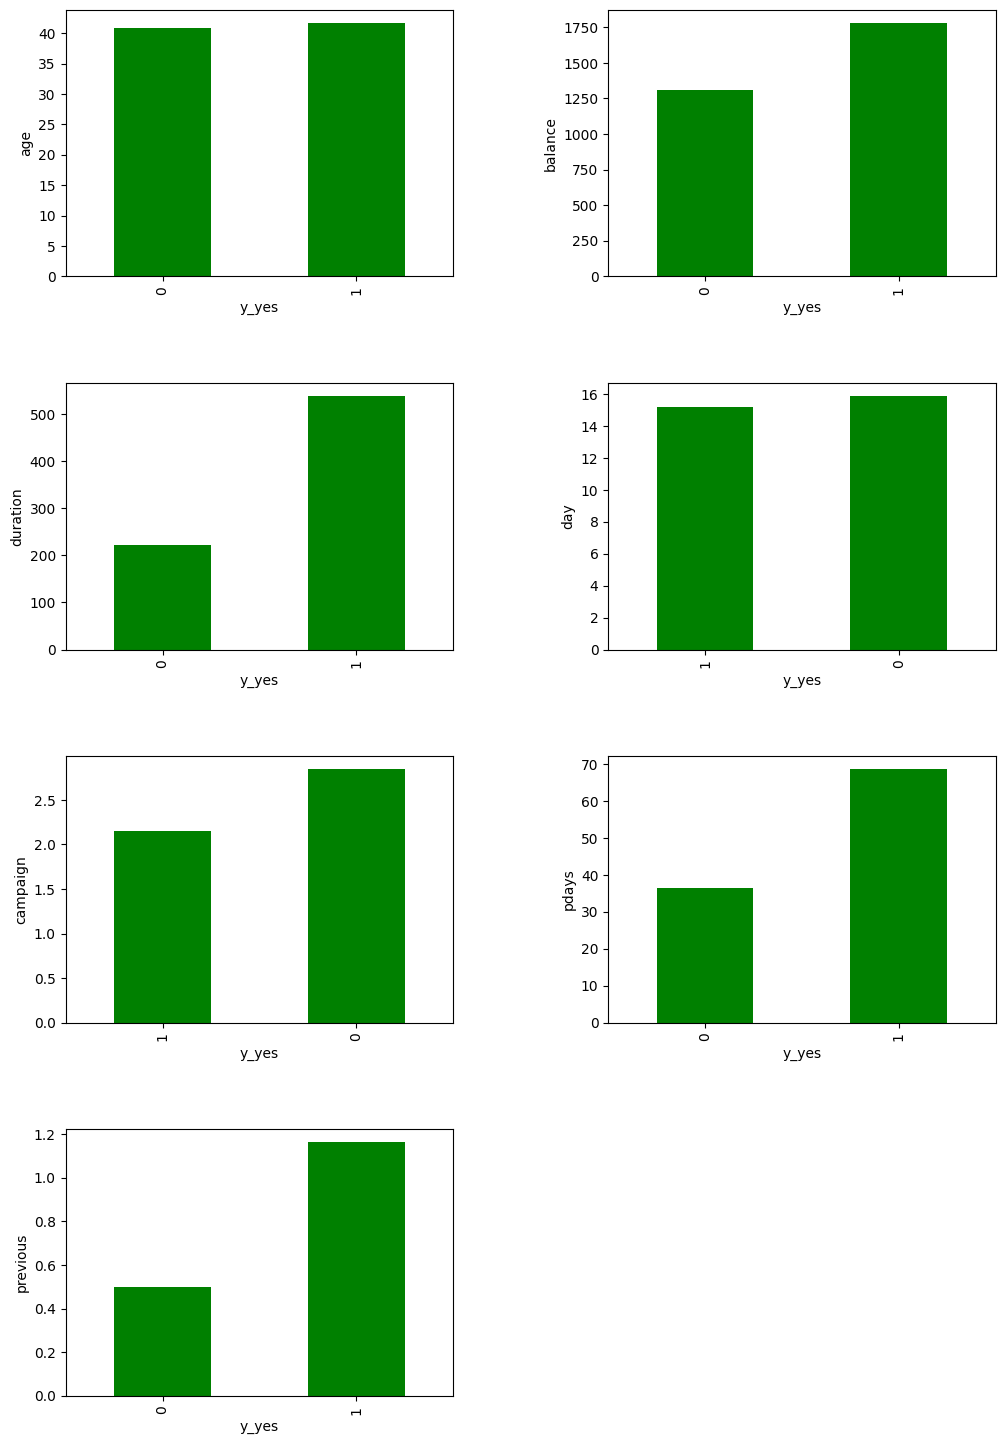

In [82]:
t = 1
plt.figure(figsize = (12,18))
for i in num_cols:
    plt.subplot(4,2,t)
    combine.groupby(by = 'y_yes')[i].mean().sort_values(ascending = True).plot(kind = 'bar', color = 'green')
    plt.ylabel(i)
    t = t+1
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

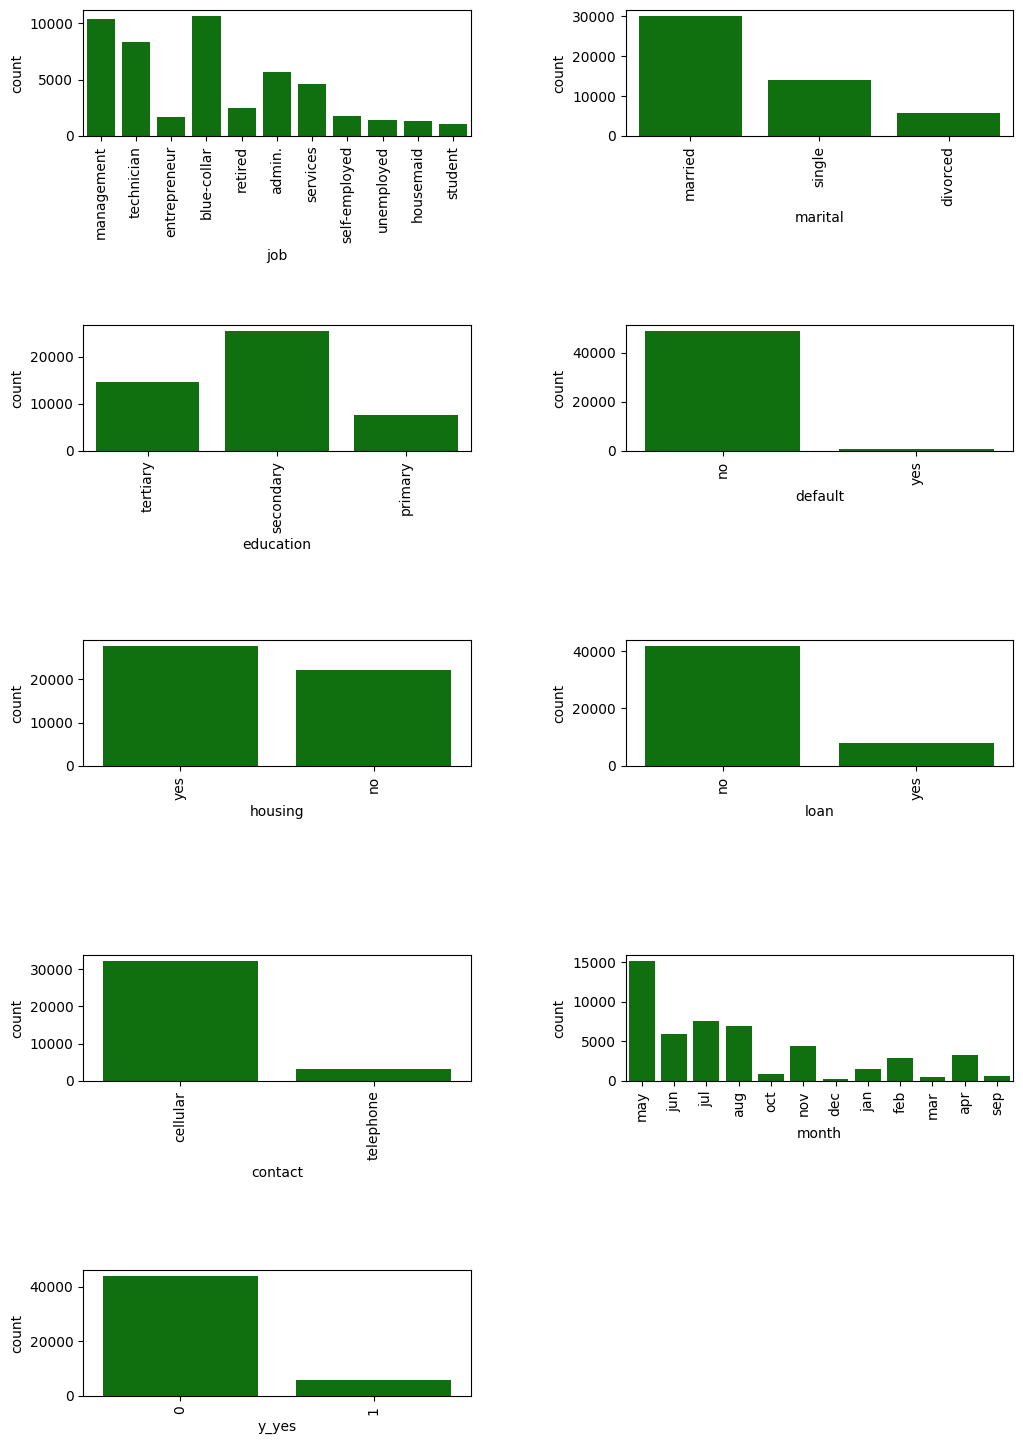

In [83]:
t = 1
plt.suptitle('Categorical variables univariate Analysis', color = 'green')
plt.figure(figsize = (12,18))
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data=combine, x=i, color = 'green')
    plt.xticks(rotation  =90)
    t = t+1
plt.subplots_adjust(hspace=1.5, wspace=0.4)
plt.show()

## Missing Values

In [84]:
combine.isnull().sum()

age              0
job            326
marital          0
education     2044
default          0
balance          0
housing          0
loan             0
contact      14344
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     40664
y_yes            0
dtype: int64

In [85]:
combine['age'].unique

<bound method Series.unique of 0        58
1        44
2        33
3        47
4        33
         ..
49727    33
49728    57
49729    57
49730    28
49731    44
Name: age, Length: 49732, dtype: int64>

In [86]:
combine['education'] = combine['education'].fillna(
    combine['age'].map(lambda x: 'primary' if x <= 18 else 'secondary' if x <= 24 else 'tertiary'))

In [87]:
combine.education.isnull().sum()

0

In [88]:
combine.groupby('education')['job'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

education
primary      blue-collar
secondary    blue-collar
tertiary      management
Name: job, dtype: object

In [89]:
combine['job'] = combine['job'].fillna(combine.groupby('education')['job'].transform
                                       (lambda x: x.mode().iloc[0]))

In [90]:
combine['job'].isnull().sum()

0

In [91]:
combine.loc[combine['contact']=='cellular',:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,NaN,0
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,NaN,0
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,NaN,0
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,NaN,0
12662,28,blue-collar,single,secondary,no,-127,yes,no,cellular,4,jul,1044,3,-1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49726,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,NaN,0
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,NaN,0
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,NaN,0
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [92]:
combine.groupby('job')['contact'].apply(lambda x: x.mode()[0])

job
admin.           cellular
blue-collar      cellular
entrepreneur     cellular
housemaid        cellular
management       cellular
retired          cellular
self-employed    cellular
services         cellular
student          cellular
technician       cellular
unemployed       cellular
Name: contact, dtype: object

In [93]:
combine.loc[combine['contact']=='telephone',:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_yes
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,NaN,0
12663,50,blue-collar,married,secondary,no,1329,yes,yes,telephone,4,jul,141,2,-1,0,NaN,0
12665,25,blue-collar,single,secondary,no,192,no,no,telephone,4,jul,112,2,-1,0,NaN,0
12674,36,unemployed,divorced,primary,no,0,no,no,telephone,4,jul,304,3,-1,0,NaN,0
12705,56,blue-collar,married,primary,no,409,yes,no,telephone,7,jul,176,6,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49654,28,management,single,tertiary,no,0,no,no,telephone,27,may,198,2,-1,0,NaN,0
49657,22,student,single,secondary,no,246,yes,no,telephone,12,may,25,1,-1,0,NaN,0
49679,42,housemaid,married,primary,no,1,yes,no,telephone,28,jul,59,5,-1,0,NaN,0
49685,44,blue-collar,married,primary,no,-237,yes,no,telephone,10,jul,73,1,-1,0,NaN,0


In [94]:
combine['contact'] = combine['contact'].fillna(combine['contact'].mode()[0])

In [95]:
combine['contact'].value_counts()

contact
cellular     46525
telephone     3207
Name: count, dtype: int64

In [96]:
combine['contact'].isnull().sum()

0

In [97]:
combine.drop(columns = ['poutcome'],inplace=  True)

In [98]:
combine.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y_yes
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,0


### Hypothesis testing of numerical columns

In [99]:
import statsmodels.formula.api as sfa
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [100]:
model = sfa.ols('y_yes~age+balance+duration+day+campaign+pdays+previous', data= combine).fit()
print(anova_lm(model))

               df       sum_sq     mean_sq            F         PR(>F)
age           1.0     3.723925    3.723925    43.627699   4.011684e-11
balance       1.0    11.492160   11.492160   134.636556   4.348391e-31
duration      1.0   798.192950  798.192950  9351.240363   0.000000e+00
day           1.0     1.156342    1.156342    13.547135   2.328920e-04
campaign      1.0     7.046028    7.046028    82.547835   1.068225e-19
pdays         1.0    52.153446   52.153446   611.004410  4.380147e-134
previous      1.0    13.188171   13.188171   154.506192   2.026733e-35
Residual  49724.0  4244.286824    0.085357          NaN            NaN


In [101]:
stats.f.isf(0.05,  dfn = 15, dfd = 795696)

1.6663985705586486

In [102]:
for i in num_cols:
    yes = combine.loc[combine['y_yes']==1,i]
    no = combine.loc[combine['y_yes']==0,i]
    stats.ttest_ind(yes,no,alternative = 'two-sided')
    print(i,':', stats.ttest_ind(yes,no,alternative = 'two-sided'))

age : TtestResult(statistic=6.00974728874957, pvalue=1.871017747031252e-09, df=49730.0)
balance : TtestResult(statistic=11.098071400422413, pvalue=1.3849084410582799e-28, df=49730.0)
duration : TtestResult(statistic=95.91154939223156, pvalue=0.0, df=49730.0)
day : TtestResult(statistic=-5.983200260564416, pvalue=2.2028729022288365e-09, df=49730.0)
campaign : TtestResult(statistic=-16.117120450454614, pvalue=2.7190929735525935e-58, df=49730.0)
pdays : TtestResult(statistic=23.242774408936974, pvalue=7.262476636353875e-119, df=49730.0)
previous : TtestResult(statistic=21.183475411321385, pvalue=3.727063034520358e-99, df=49730.0)


In [103]:
stats.norm.isf(0.05/2)

1.9599639845400545

### Hypothesis testing for categorical columns

In [104]:
df1 = pd.crosstab(index = combine['job'], columns = combine['y_yes'])
p_value1 = stats.chi2_contingency(df1)[1]
if p_value1 > 0.05:
    print('Job attribute is not significant')
else:
    print('Job attribute is significant')

Job attribute is significant


In [105]:
df2 = pd.crosstab(index = combine['marital'], columns = combine['y_yes'])
p_value2 = stats.chi2_contingency(df2)[1]
if p_value2 > 0.05:
    print('Marital attribute is not significant')
else:
    print('Marital attribute is significant')

Marital attribute is significant


In [106]:
df3 = pd.crosstab(index = combine['education'], columns = combine['y_yes'])
p_value3 = stats.chi2_contingency(df3)[1]
if p_value3 > 0.05:
    print('Education attribute is not significant')
else:
    print('Education attribute is significant')

Education attribute is significant


In [107]:
df4 = pd.crosstab(index = combine['default'], columns = combine['y_yes'])
p_value4 = stats.chi2_contingency(df4)[1]
if p_value4 > 0.05:
    print('Default attribute is not significant')
else:
    print('Default attribute is significant')

Default attribute is significant


In [108]:
df5 = pd.crosstab(index = combine['housing'], columns = combine['y_yes'])
p_value5 = stats.chi2_contingency(df5)[1]
if p_value3 > 0.05:
    print('Housing attribute is not significant')
else:
    print('Housing attribute is significant')

Housing attribute is significant


In [109]:
df6 = pd.crosstab(index = combine['loan'], columns = combine['y_yes'])
p_value6 = stats.chi2_contingency(df6)[1]
if p_value6 > 0.05:
    print('Loan attribute is not significant')
else:
    print('Loan attribute is significant')

Loan attribute is significant


In [110]:
df7 = pd.crosstab(index = combine['contact'], columns = combine['y_yes'])
p_value7 = stats.chi2_contingency(df7)[1]
if p_value7 > 0.05:
    print('Contact attribute is not significant')
else:
    print('Contact attribute is significant')

Contact attribute is significant


In [111]:
df8 = pd.crosstab(index = combine['month'], columns = combine['y_yes'])
p_value8 = stats.chi2_contingency(df8)[1]
if p_value8 > 0.05:
    print('Month attribute is not significant')
else:
    print('Month attribute is significant')

Month attribute is significant


### Encoding

In [112]:
combine = pd.get_dummies(combine, columns=['marital','default','housing','loan','contact'], drop_first=True, dtype=int)

In [113]:
map1 = combine['job'].value_counts(normalize=True).to_dict()
combine['job'] = combine['job'].map(map1)

In [115]:
combine['month']  = combine['month'].map(combine['month'].value_counts(normalize=True).to_dict())

In [119]:
combine['education'] = combine['education'].map({'primary':1,'secondary':2, 'tertiary':3})

In [121]:
combine.head(3)

,age,job,education,balance,day,month,duration,campaign,pdays,previous,y_yes,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone
0,58,0.213464,3,2143,5,0.304914,261,1,-1,0,0,1,0,0,1,0,0
1,44,0.168202,2,29,5,0.304914,151,1,-1,0,0,0,1,0,1,0,0
2,33,0.033278,2,2,5,0.304914,76,1,-1,0,0,1,0,0,1,1,0


### Modelling

In [122]:
x_train = combine.loc[0:45210, combine.columns != 'y_yes']

In [123]:
y_train = combine.loc[0:45210,'y_yes']

In [124]:
x_test = combine.loc[45211:, combine.columns != 'y_yes']
y_test = combine.loc[45211:,'y_yes']

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report

### Logistic Regression

In [161]:
cw_0= len(y_train)/(2*y_train.value_counts()[0])
cw_1 = len(y_train)/(2*y_train.value_counts()[1])

In [162]:
print(cw_0)
print(cw_1)

0.566241671258955
4.274059368500661


In [163]:
lr = LogisticRegression(class_weight={0: cw_0, 1:cw_1})
model_lr = lr.fit(x_train,y_train)

In [164]:
y_preds_lr = model_lr.predict_proba(x_test)[:,1]
y_predh_lr = (y_preds_lr>0.5).astype(int)

In [165]:
print(confusion_matrix(y_test,y_predh_lr))
print(f'Precision_score: {precision_score(y_test,y_predh_lr)}')
print(f'Recall_score: {recall_score(y_test,y_predh_lr)}')
print(f' roc_auc_score: {roc_auc_score(y_test,y_predh_lr)}')

[[3192  808]
 [ 142  379]]
Precision_score: 0.3192923336141533
Recall_score: 0.727447216890595
 roc_auc_score: 0.7627236084452975


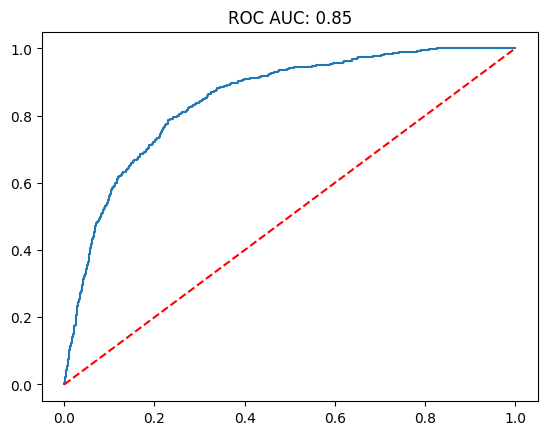

In [167]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_lr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),2)}')
plt.show()

### Random Forest Classifier using GridSearchCV

In [171]:
grid = {'max_depth':[4,5,6], 'min_samples_split':[8,9,10]}
gscv = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100), param_grid=grid, cv=5, scoring='roc_auc')
model_cv = gscv.fit(x_train,y_train)

In [172]:
model_cv.best_params_

{'max_depth': 4, 'min_samples_split': 8}

In [173]:
rf = RandomForestClassifier(n_estimators=100, **model_cv.best_params_)
model_rf = rf.fit(x_train,y_train)

In [174]:
y_preds_rf = model_rf.predict_proba(x_test)[:,1]
y_predh_rf = (y_preds_rf>0.5).astype(int)

In [175]:
print(confusion_matrix(y_test,y_predh_rf))
print(f'Precision_score: {precision_score(y_test,y_predh_rf)}')
print(f'Recall_score: {recall_score(y_test,y_predh_rf)}')
print(f' roc_auc_score: {roc_auc_score(y_test,y_predh_rf)}')

[[3993    7]
 [ 509   12]]
Precision_score: 0.631578947368421
Recall_score: 0.023032629558541268
 roc_auc_score: 0.5106413147792705


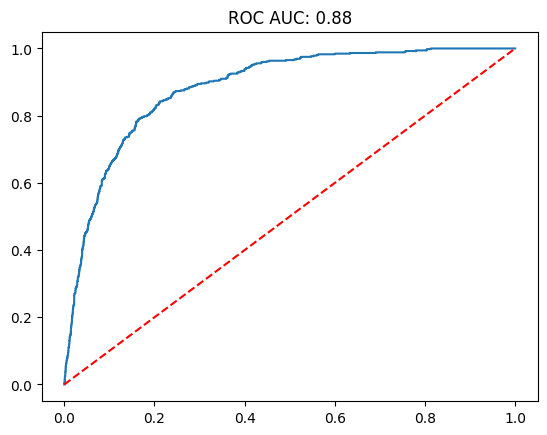

In [176]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_rf)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_rf),2)}')
plt.show()

### XGBoost Classifier using GridSearchCV

In [177]:
grid1 = {'max_depth':[4,5,6], 'learning_rate':[0.1,0.2,0.3]}
gscv1 = GridSearchCV(estimator=XGBClassifier( n_estimators=100), param_grid=grid1, cv=5, scoring='roc_auc')
model_cv1 = gscv1.fit(x_train, y_train)

In [178]:
model_cv1.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [179]:
xgb = XGBClassifier(n_estimators=100, **model_cv1.best_params_)
model_xgb = xgb.fit(x_train,y_train)

In [180]:
y_preds_xgb = model_xgb.predict_proba(x_test)[:,1]
y_predh_xgb = (y_preds_xgb>0.5).astype(int)

In [182]:
print(confusion_matrix(y_test,y_predh_xgb))
print(f'Precision_score: {precision_score(y_test,y_predh_xgb)}')
print(f'Recall_score: {recall_score(y_test,y_predh_xgb)}')
print(f' roc_auc_score: {roc_auc_score(y_test,y_predh_xgb)}')

[[3875  125]
 [ 290  231]]
Precision_score: 0.648876404494382
Recall_score: 0.44337811900191937
 roc_auc_score: 0.7060640595009597


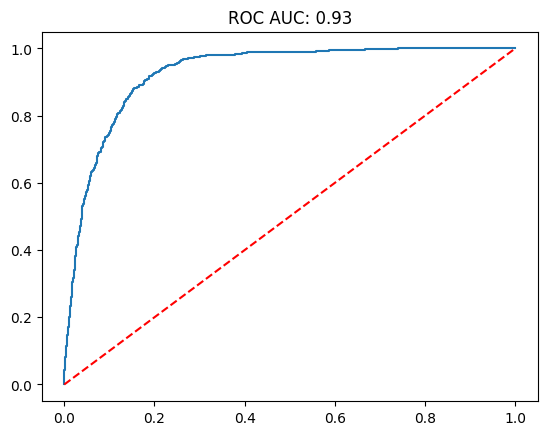

In [184]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_xgb)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_xgb),2)}')
plt.show()